In [1]:
import pandas as pd
import warnings
import seaborn as sns
import numpy as np

warnings.filterwarnings("ignore")

df = pd.read_csv("datasets/heart.csv")

# display first few rows of data
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [2]:
print(f"ChestPainType {pd.unique(df.ChestPainType)} RestingECG  {pd.unique(df.RestingECG)} ST_Slope {pd.unique(df.ST_Slope)}")

ChestPainType ['ATA' 'NAP' 'ASY' 'TA'] RestingECG  ['Normal' 'ST' 'LVH'] ST_Slope ['Up' 'Flat' 'Down']


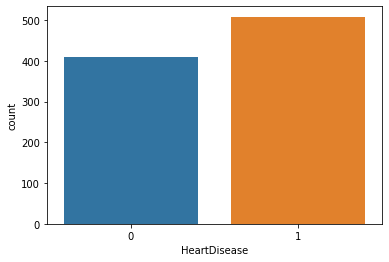

In [3]:
# check distribution of heart disease
ax = sns.countplot(x ="HeartDisease", data = df)

In [4]:
# sex
df['Sex'] = df['Sex'].replace(['F','M'],['0', '1'])

# chest pain type
df['ChestPainType'] = df['ChestPainType'].replace(['TA', 'ATA','NAP', 'ASY'], ['1', '2', '3', '4'])

# resting ecg
df['RestingECG'] =df['RestingECG'].replace(['Normal', 'ST', 'LVH'], ['0', '1', '2'])

# exercise angina
df['ExerciseAngina'] = df['ExerciseAngina'].replace(['N', 'Y'], ['0', '1'])

# ST slope
df['ST_Slope'] = df['ST_Slope'].replace(['Up', 'Flat', 'Down'], ['1', '2', '3'])

# check changes
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [5]:
from sklearn.model_selection import train_test_split

# splitting data
X = df.drop(["HeartDisease"], 1)
y = df[["HeartDisease"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [6]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clas = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, random_state=0)
gb_clas = gb_clas.fit(X_train, y_train)

# generating predictions
y_pred = gb_clas.predict(X_test)

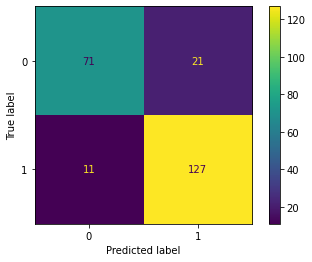

In [7]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)

cm_display.plot()

In [8]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.8881118881118881

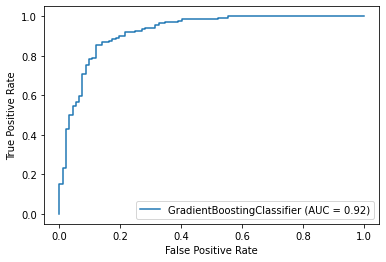

In [9]:
metrics.plot_roc_curve(gb_clas, X_test, y_test) 

In [10]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, gb_clas.decision_function(X_test))

0.9227315689981096

In [11]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [26]:
obs = [[54, 1, 2, 122, 0, 0, 0, 149, 0, 0.5, 2]] # Prediccion con este array de datos
#obs = [[48,0,4,138,214,0,0,108,1,1.5,2]]        # Prediccion con este array de datos

# Un 0 = no HeartDisease, un 1 = HeartDisease
print(gb_clas.predict(obs))

[0]


In [27]:
df_feature_importance = pd.DataFrame(gb_clas.feature_importances_, index = X.columns, columns = ["Feature Score"])

# sort values into descending order
df_feature_importance.sort_values(by = "Feature Score", ascending=False, inplace = True)

df_feature_importance

,Feature Score
ST_Slope,0.524203
ChestPainType,0.103075
MaxHR,0.077767
Oldpeak,0.065709
Cholesterol,0.052679
Sex,0.040593
ExerciseAngina,0.037718
Age,0.031694
RestingBP,0.031247
FastingBS,0.021645
